# Mạng R-CNN 
## Bài toán object detection

Bài trước, chúng ta đã tìm hiểu về ứng dụng mô hình CNN cho bài toán phân loại ảnh, tuy nhiên các ảnh input của bài toán phân loại chỉ bao gồm 1 đối tượng cụ thể như ảnh của 1 chữ số hay 1 bông hoa.
![]()


Tuy nhiên thông thường một ảnh chứa nhiều đối tượng. Ta phải tách ra từng đối tượng một, nó ở đâu và nó là cái gì. Bài toán như vậy được gọi là: object detection.

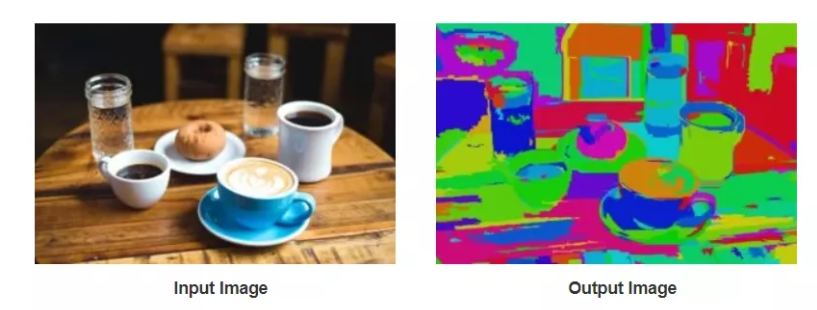

Bài toán object detection gồm 2 việc:
- Xác định các bounding box (hình chữ nhật) quanh đối tượng.
- Mỗi bouding box thì cần phân loại xem đấy là đối tượng gì (chó, ngựa, ô tô,…) với bao nhiêu phần trăm chắc chắn.

Vậy mô hình CNN có giải quyết được bài toán object detection không? Vấn đề chính là vì không biết trước có bao nhiêu đối tượng trong ảnh, nên không thiết kế được output layer hiệu quả => mô hình CNN truyền thống không giải quyết được => R-CNN (regional convolutional neural network) ra đời.

# Faster R-CNN
## R-CNN (Region with CNN feature)
Ý tưởng thuật toán R-CNN khá đơn giản

Bước 1: Dùng Selective Search algorithm để lấy ra khoảng 2000 bounding box trong input mà có khả năng chứa đối tượng.

Bước 2: Với mỗi bounding box ta xác định xem nó là đối tượng nào (người, ô tô, xe đạp,…)

## Selective search algorithm
Input của thuật toán là ảnh màu, output là khoảng 2000 region proposal (bounding box) mà có khả năng chứa các đối tượng.

Đầu tiên ảnh được segment qua thuật toán Graph Based Image Segmentation, thuật toán dựa vào lý thuyết đồ thị và không áp dụng deep learning.  

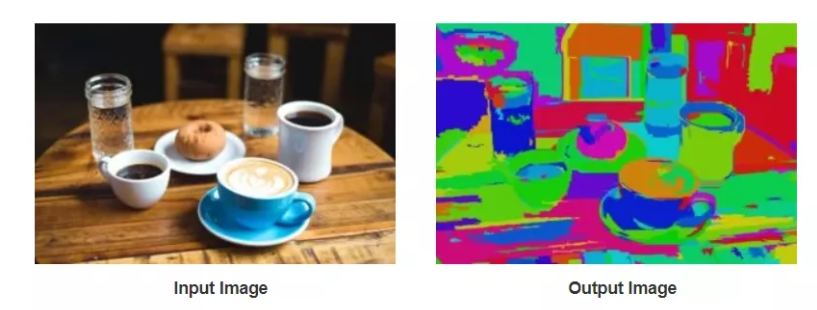

Nhận xét: Ta không thể dùng mỗi màu trong output để làm 1 region proposal được vì:

- Mỗi đối tượng trong ảnh có thể chứa nhiều hơn 1 màu.
- Các đối tượng bị che mất một phần như cái đĩa dưới cái chén không thể xác định được.

=> Cần nhóm các vùng màu với nhau để làm region proposal.

Tiếp theo, các vùng màu được nhóm với nhau dựa trên độ tương đồng về màu sắc, hướng gradient, kích thước,…

Cuối cùng các region proposal được xác định dựa trên các nhóm vùng màu.

## Phân loại region proposal
Bài toán trở thành phân loại ảnh cho các region proposal. Do thuật toán selective search cho tới 2000 region proposal nên có rất nhiều region proposal không chứa đối tượng nào. Vậy nên ta cần thêm 1 lớp background (không chứa đối tượng nào). Ví dụ như hình dưới ta có 4 region proposal, ta sẽ phân loại mỗi bounding box là người, ngựa hay background.

Sau đó các region proposal được resize lại về cùng kích thước và thực hiện transfer learning với feature extractor, sau đó các extracted feature được cho vào thuật toán SVM để phân loại ảnh.

Bên cạnh đó thì extracted feature cũng được dùng để dự đoán 4 offset values cho mỗi cạnh. Ví dụ như khi region proposal chứa người nhưng chỉ có phần thân và nửa mặt, nửa mặt còn lại không có trong region proposal đó thì offset value có thể giúp mở rộng region proposal để lấy được toàn bộ người.

## Vấn đề với R-CNN
Thuật toán hoạt động khá tốt so với các thuật toán về computer vision trước đó nhờ vào CNN, tuy nhiên nó vẫn có khá nhiều hạn chế:

- Vì với mỗi ảnh ta cần phân loại các class cho 2000 region proposal nên thời gian train rất lâu.

- Không thể áp dụng cho real-time thì mỗi ảnh trong test set mất tới 47s để xử lý.

## Fast R-CNN 
Được giới thiệu bới cùng tác giả của R-CNN, nó giải quyết được một số hạn chế của R-CNN để cải thiện tốc độ.

Tương tự như R-CNN thì Fast R-CNN vẫn dùng selective search để lấy ra các region proposal. Tuy nhiên nó không tách 2000 region proposal ra khỏi ảnh và image classification cho mỗi ảnh. 

Fast R-CNN cho cả bức ảnh vào ConvNet (một vài convolutional layer + max pooling layer) để tạo ra convolutional feature map.

Sau đó các vùng region proposal được lấy ra tương ứng từ convolutional feature map. Tiếp đó được Flatten và thêm 2 Fully connected layer (FCs) để dự đoán lớp của region proposal và giá trị offset values của bounding box.

Tuy nhiên là kích thước của các region proposal khác nhau nên khi Flatten sẽ ra các vector có kích thước khác nhau nên không thể áp dụng neural network được. Xem lại ở trên R-CNN đã xử lý như thế nào? Nó đã resize các region proposal về cùng kích thước trước khi dùng transfer learning. Tuy nhiên ở feature map ta không thể resize được, nên ta phải có cách gì đấy để chuyển các region proposal trong feature map về cùng kích thước => Region of Interest (ROI) pooling ra đời.
















